In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pybrain

#pd.core.format.set_option('notebook_repr_html',True)
%matplotlib inline

# Quick and Dirty Introduction to Neural Networks

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Artificial Neuron




<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png">

$$o_j^{(n)} = f\left(\sum_{i\; in\; layer (n-1)}w_{ij}o_i^{(n-1)} \right)$$

## Step activation function
<img src="https://c.mql5.com/2/4/act1.png">

## Logistic activation function

$$f(x) = \frac{1}{1 - e^{-(x-b)}}$$

<img width= 300 src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/400px-SigmoidFunction.png">

## Question: How to program an artificial neuron to calculate the *and* function?

<table>
<tr>
<th>X</th>
<th>Y</th>
<th>X and Y</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
</table>

<img width=500 src="2in-neuron.jpg">



In [15]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 1, outclass=pybrain.SigmoidLayer)
print(net.params)


[ 0.02784539 -0.46919269 -0.14055315]


In [16]:
def print_pred2(dataset, network):
    df = pd.DataFrame(dataset.data['sample'][:dataset.getLength()],columns=['X', 'Y'])
    prediction = np.round(network.activateOnDataset(dataset),3)
    df['output'] = pd.DataFrame(prediction)
    return df

from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
D = UnsupervisedDataSet(2) # define a dataset in pybrain
D.addSample([0,0])
D.addSample([0,1])
D.addSample([1,0])
D.addSample([1,1])
print_pred2(D, net)

,X,Y,output
0,0.0,0.0,0.507
1,0.0,1.0,0.472
2,1.0,0.0,0.391
3,1.0,1.0,0.358


In [17]:
net.params[:] = [-40, 50,  50]
print_pred2(D, net)

,X,Y,output
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,1.0


## Question: How to program an artificial neuron to calculate the *xor* function?

<table>
<tr>
<th>X</th>
<th>Y</th>
<th>X and Y</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
</table>

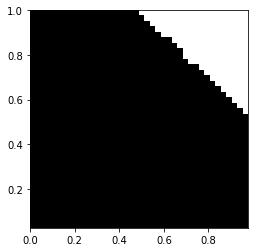

In [18]:
def plot_nn_prediction(N): 
    # a function to plot the binary output of a network on the [0,1]x[0,1] space
    x_list = np.arange(0.0,1.0,0.025)
    y_list = np.arange(1.0,0.0,-0.025)    
    z = [0.0 if N.activate([x,y])[0] <0.5 else 1.0  for y in y_list for x in x_list]
    z = np.array(z)
    grid = z.reshape((len(x_list), len(y_list)))
    plt.imshow(grid, extent=(x_list.min(), x_list.max(), y_list.min(), y_list.max()),cmap=plt.get_cmap('Greys_r'))
    plt.show()

net.params[:] = [-30, 20, 20]
plot_nn_prediction(net)

<br/>
<br/>
## Answer: It is impossible with only one neuron!
<br/>
<br/>  
<br/>
<br/> 
  
## We need to use more than one neuron....

<img src="http://www.cs.nott.ac.uk/~gxk/courses/g5aiai/006neuralnetworks/images/ffnet.jpg">

In [19]:
Dtrain = SupervisedDataSet(2,1) # define a dataset in pybrain
Dtrain.addSample([0,0],[0])
Dtrain.addSample([0,1],[1])
Dtrain.addSample([1,0],[1])
Dtrain.addSample([1,1],[0])

from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(2, 2, 1, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
T.trainOnDataset(Dtrain, 1000)
print(net.params)
print_pred2(D, net)

[ 3.49805396  4.63908924 -3.9415791  -5.81445757  6.37577644  2.27862714
 -3.14978683 -4.21825137  0.60439417]


,X,Y,output
0,0.0,0.0,0.339
1,0.0,1.0,0.327
2,1.0,0.0,0.931
3,1.0,1.0,0.334


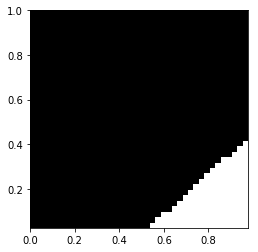

In [20]:
plot_nn_prediction(net)

## The Little Red Riding Hood Neural Network

<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

<img src="lrrh net.jpg">


### Training

In [21]:
from pybrain.tools.validation import Validator

validator =  Validator()
Dlrrh = SupervisedDataSet(4,4) 
Dlrrh.addSample([1,1,0,0],[1,0,0,0])
Dlrrh.addSample([0,1,1,0],[0,0,1,1])
Dlrrh.addSample([0,0,0,1],[0,1,1,0])
print(Dlrrh)
df = pd.DataFrame(Dlrrh['input'],columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print(df.join(pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss'])))
net = buildNetwork(4, 3, 4, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)


input: dim(6, 4)
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]]

target: dim(6, 4)
[[1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]]


   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0       1.0        1.0       0.0       0.0     1.0  0.0   0.0   0.0
1       0.0        1.0       1.0       0.0     0.0  0.0   1.0   1.0
2       0.0        0.0       0.0       1.0     0.0  1.0   1.0   0.0


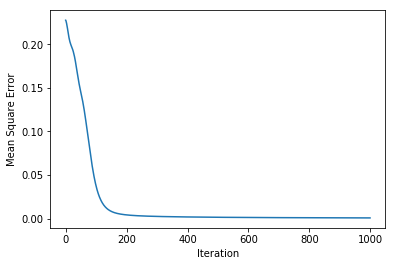

In [22]:
T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
scores = []
for i in range(1000):
    T.trainOnDataset(Dlrrh, 1)
    prediction = net.activateOnDataset(Dlrrh)
    scores.append(validator.MSE(prediction, Dlrrh.getField('target')))
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.plot(scores)


### Prediction

In [23]:
def lrrh_input(vals):
    return pd.DataFrame(vals,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [24]:
in_vals = [1,1,1,0]
lrrh_input(in_vals)

,input
big ears,1
big teeth,1
handsome,1
wrinkled,0


In [25]:
lrrh_output(net.activate(in_vals))

,output
scream,0.706955
hug,0.003083
offer food,0.299992
kiss cheek,0.649794
